In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [176]:
def func(t, a, b):
    return a * np.exp(b * t)

def func2(x, b, k, c):
    t, E = x
    return (k*E+c) * np.exp(b * t)

In [177]:
energy = np.array([1.62, 1.72, 1.82, 1.92, 2.02, 2.12, 2.22, 2.32])
ds = []
ds.append(np.genfromtxt('Table1.csv', delimiter=','))
ds.append(np.genfromtxt('Table2.csv', delimiter=','))
ds.append(np.genfromtxt('Table3.csv', delimiter=','))
ds.append(np.genfromtxt('Table4.csv', delimiter=','))
ds.append(np.genfromtxt('Table5.csv', delimiter=','))
ds.append(np.genfromtxt('Table6.csv', delimiter=','))
ds.append(np.genfromtxt('Table7.csv', delimiter=','))
ds.append(np.genfromtxt('Table8.csv', delimiter=','))

Separate fit

Text(0.05, 0.9, '$E_{\\gamma}$=2.27-2.37GeV')

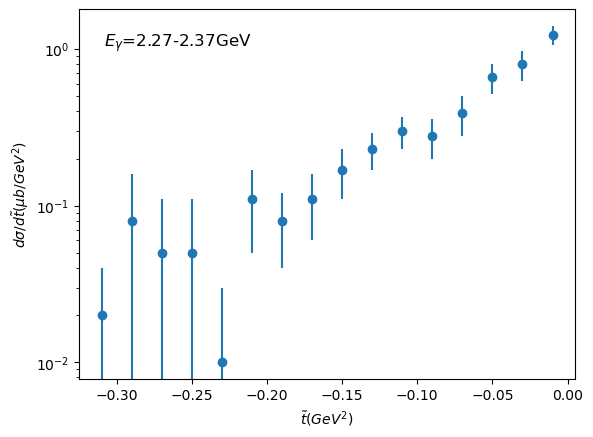

In [183]:
plt.errorbar(ds[7][:,0], ds[7][:,3], yerr=ds[7][:,4], fmt='o')
plt.yscale('log')
plt.xlabel(r'$\tilde{t} (GeV^2)$')
plt.ylabel(r'$d\sigma/d\tilde{t} (\mu b/GeV^2)$')
plt.text(0.05, 0.9, r'$E_{\gamma}$='+str(energy[i]-0.05)+'-'+str(round(energy[i]+0.05, 2))+'GeV', fontsize=12, transform=plt.gca().transAxes)

In [185]:
popt = []
pcov = []
fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True, dpi=1000)
plt.subplots_adjust(hspace=0, wspace=0)
plt.yscale('log')
for i in range(2):
    ax[i,0].set_ylabel(r'$d\sigma/d\tilde{t} (\mu b/GeV^2)$')
for i in range(4):
    ax[1,i].set_xlabel(r'$\tilde{t} (GeV^2)$')
    ax[1,i].set_xticks(np.arange(-0.35,0.05,0.05))
    ax[0,i].set_xticks([])

for i in range(8):
    this_popt, this_pcov = curve_fit(func, ds[i][:,0], ds[i][:,3], sigma=ds[i][:,4], absolute_sigma=True)
    popt.append(this_popt)
    pcov.append(this_pcov)
    ax[i//4,i%4].errorbar(ds[i][:,0], ds[i][:,3], yerr=ds[i][:,4], fmt='o')
    ax[i//4,i%4].plot(ds[i][:,0], func(ds[i][:,0], *this_popt), 'r--')
    ax[i//4,i%4].set_xlim(-0.4,0)
    ax[i//4,i%4].text(0.05, 0.9, r'$E_{\gamma}$='+str(round(energy[i]-0.05, 2))+'-'+str(round(energy[i]+0.05, 2))+'GeV', fontsize=12, transform=ax[i//4,i%4].transAxes)
popt = np.array(popt)

(0.0, 30.0)

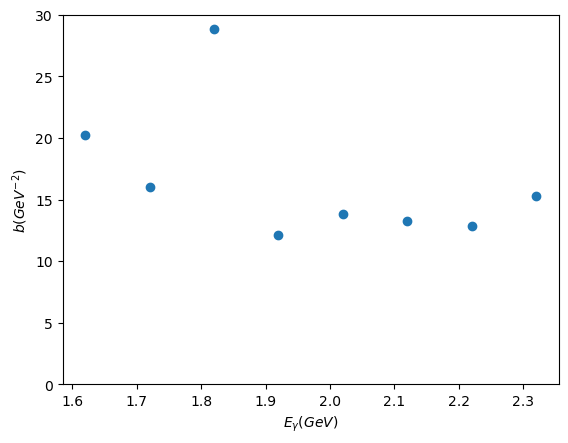

In [186]:
plt.plot(energy, popt[:,1], 'o')
plt.xlabel(r'$E_{\gamma} (GeV)$')
plt.ylabel(r'$b (GeV^{-2})$')
plt.ylim(0, 30)

(0.0, 1.5)

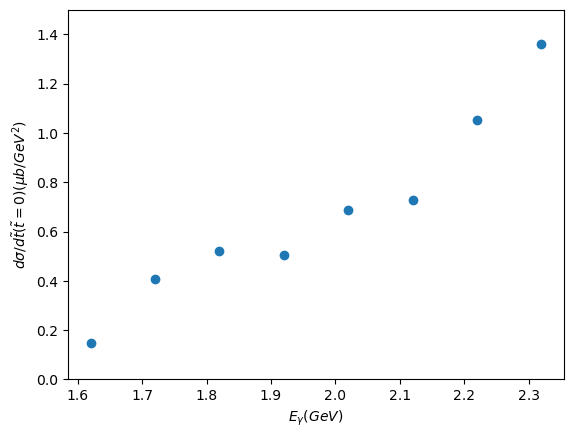

In [187]:
plt.plot(energy, popt[:,0], 'o')
plt.xlabel(r'$E_{\gamma} (GeV)$')
plt.ylabel(r'$d\sigma/d\tilde{t} (\tilde{t}=0) (\mu b/GeV^2)$')
plt.ylim(0,1.5)

Combined fit

In [188]:
xdata = np.stack((ds[0][:,0], energy[0]*np.ones(ds[0][:,0].shape)), axis=1)
ydata = ds[0][:,3]
yerr = ds[0][:,4]
for i in range(1,8):
    xdata = np.concatenate((xdata, np.stack((ds[i][:,0], energy[i]*np.ones(ds[i][:,0].shape)), axis=1)), axis=0)
    ydata = np.concatenate((ydata, ds[i][:,3]))
    yerr = np.concatenate((yerr, ds[i][:,4]))
xdata = xdata.transpose()

popt_combined, pcov_combined = curve_fit(func2, xdata, ydata, sigma=yerr, absolute_sigma=True)

fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True, dpi=1000)
plt.subplots_adjust(hspace=0, wspace=0)
plt.yscale('log')
for i in range(2):
    ax[i,0].set_ylabel(r'$d\sigma/d\tilde{t} (\mu b/GeV^2)$')
for i in range(4):
    ax[1,i].set_xlabel(r'$\tilde{t} (GeV^2)$')
    ax[1,i].set_xticks(np.arange(-0.35,0.05,0.05))
    ax[0,i].set_xticks([])

for i in range(8):
    this_popt = np.array([popt_combined[1]*energy[i]+popt_combined[2], popt_combined[0]])
    print(this_popt)
    ax[i//4,i%4].errorbar(ds[i][:,0], ds[i][:,3], yerr=ds[i][:,4], fmt='o', label='data')
    ax[i//4,i%4].plot(ds[i][:,0], func(ds[i][:,0], *this_popt), 'r--', label='fit: a=%5.3f, b=%5.3f' % tuple(this_popt))
    ax[i//4,i%4].set_xlim(-0.4,0)
    ax[i//4,i%4].text(0.05, 0.9, r'$E_{\gamma}$='+str(round(energy[i]-0.05, 2))+'-'+str(round(energy[i]+0.05, 2))+'GeV', fontsize=12, transform=ax[i//4,i%4].transAxes)

[ 0.08854958 14.01970888]
[ 0.24460821 14.01970888]
[ 0.40066684 14.01970888]
[ 0.55672548 14.01970888]
[ 0.71278411 14.01970888]
[ 0.86884274 14.01970888]
[ 1.02490137 14.01970888]
[ 1.18096    14.01970888]


In [189]:
popt_combined

array([14.01970888,  1.56058631, -2.43960024])